# **Sign Language: CNN**

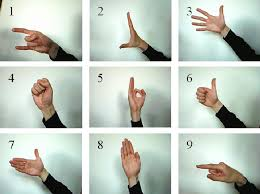

# Importing Modules

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore")
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, accuracy_score
# tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping

In [ ]:
# importing train and test dataset
train = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")
test = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")

In [ ]:
train

In [ ]:
train.label.nunique()

# Converting dataframe into Array

In [ ]:
train = train.values
test = test.values

In [ ]:
train_label = train[:,0]
train_images = train[:,1:]

test_label = test[:,0]
test_images = test[:,1:]

#changing shape of data
train_images = train_images.reshape(train_images.shape[0], *(28, 28, 1))
test_images = test_images.reshape(test_images.shape[0],*(28,28,1))

In [ ]:
# new shape of data for acceptance to CNN
print(train_images.shape)
print(test_images.shape)

In [ ]:
import random
#Randomly check some image from the file
#Run this block multiple times to see different images
i = random.randint(1, 27456)
plt.imshow(train[i, 1:].reshape(28,28))
label = train[i, 0]
print(label)

In [ ]:
i = random.randint(1, 27456)
plt.imshow(train[i, 1:].reshape(28,28))
label = train[i, 0]
print(label)

# Data Augmentation
* The Keras ImageDataGenerator class actually works by:

1. Accepting a batch of images used for training.
2. Taking this batch and applying a series of random transformations to each image in the batch (including random rotation, resizing, shearing, etc.).
3. Replacing the original batch with the new, randomly transformed batch.
4. Training the CNN on this randomly transformed batch (i.e., the original data itself is not used for training).

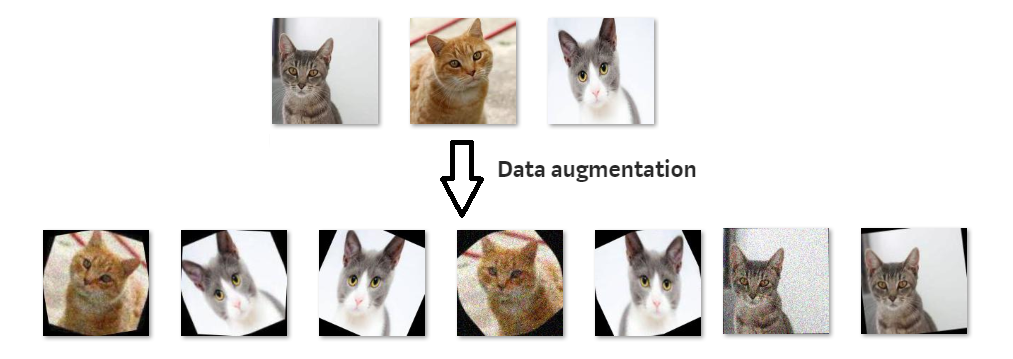

In [ ]:
# defining training and testing ImageDataGenerator
train_datagen = ImageDataGenerator(#preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
                                  rescale = 1./255,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow(train_images,train_label, 
                                batch_size=32
                                                 )
test_gen = test_datagen.flow( test_images,test_label,
                                                batch_size=32,
                                               )

# CNN Model (Convolutional Neural Network):
* A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. 

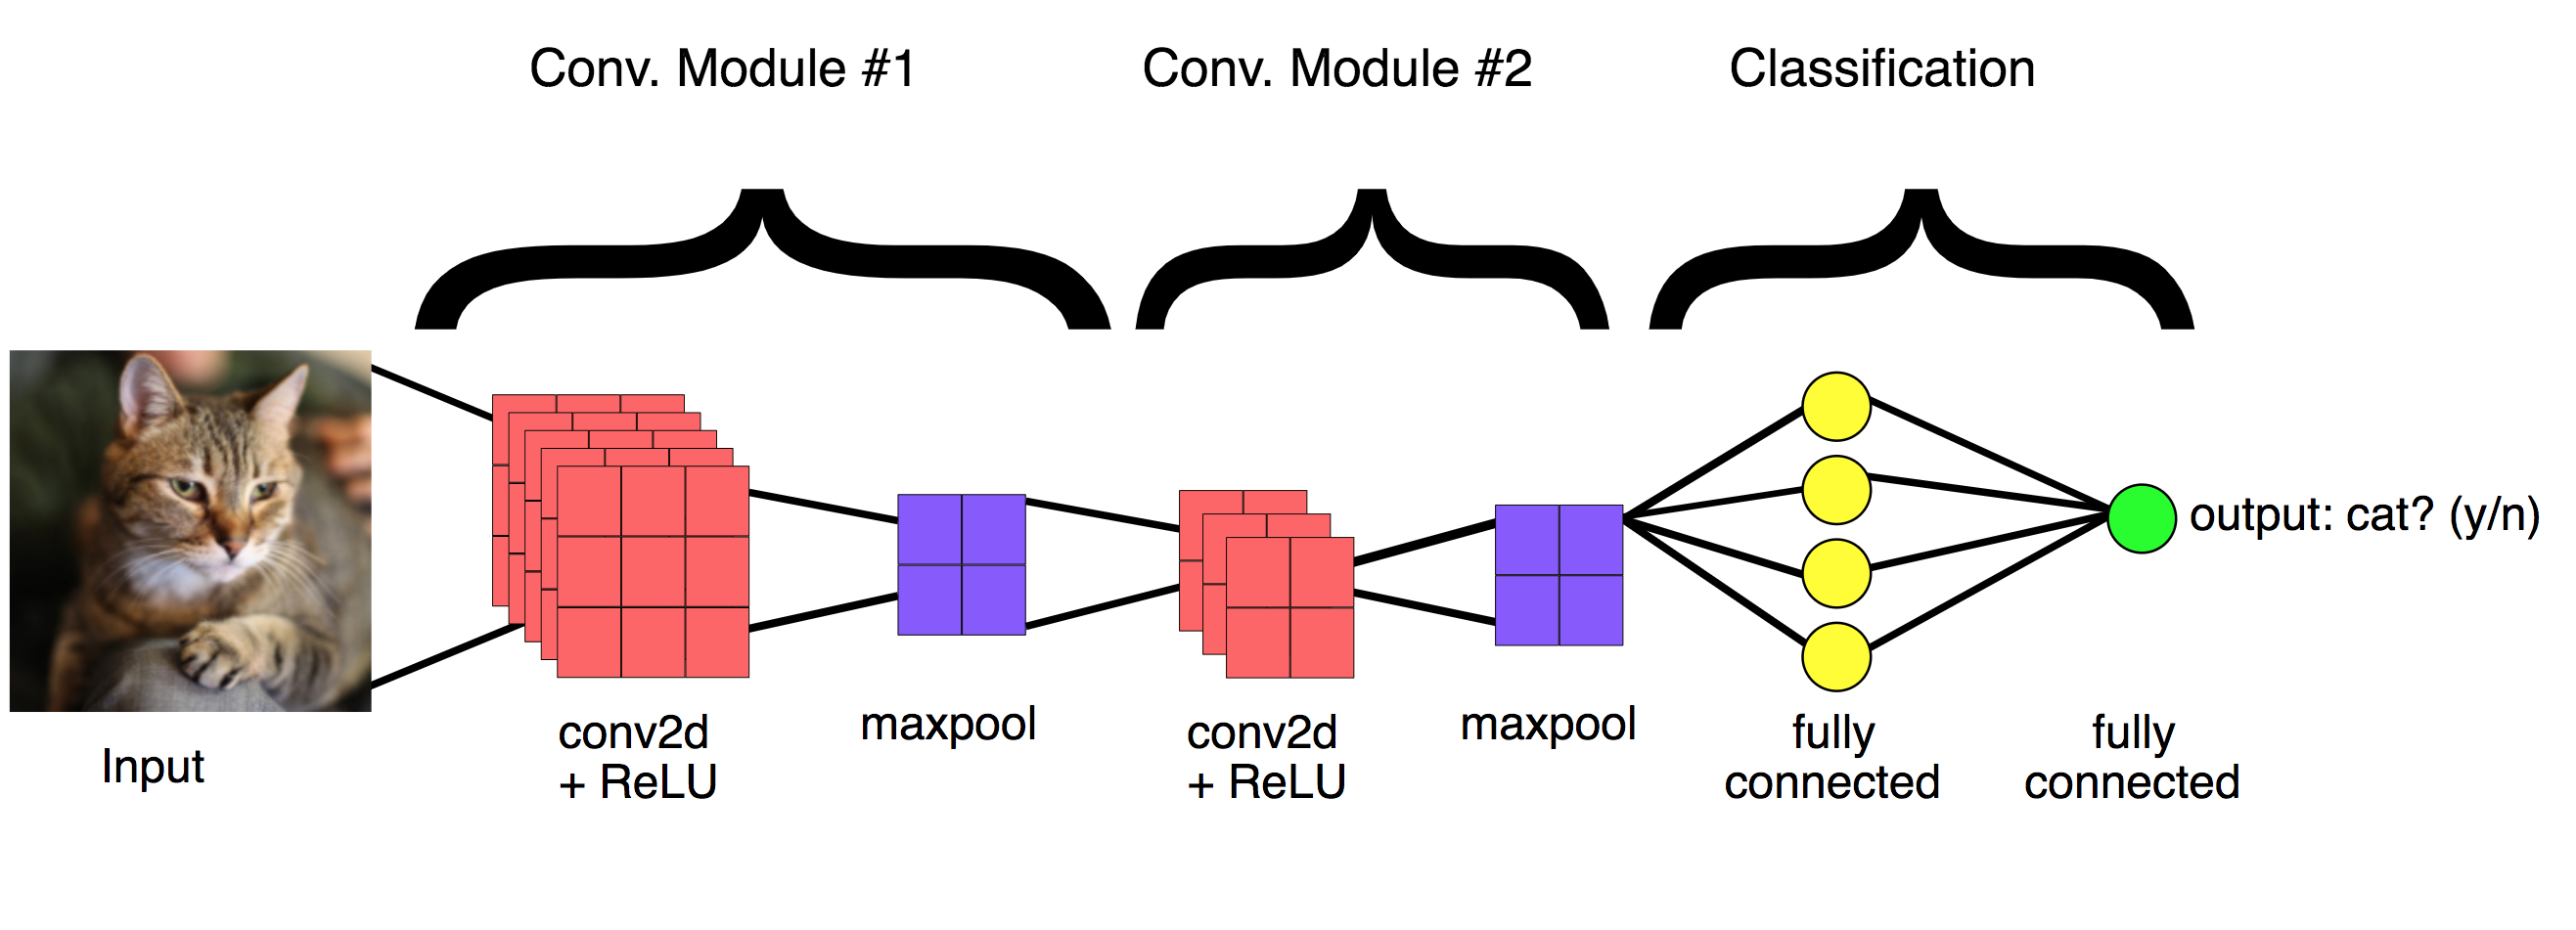

In [ ]:
# defining Sequential model
model = Sequential()

#adding conv-pool layers
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),activation="relu",input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#addin flatten layer
model.add(Flatten())

#adding dense layer
model.add(Dense(512,activation="relu"))
model.add(Dropout(rate=0.3))
model.add(Dense(64, activation="relu"))

#adding output layer
model.add(Dense(25, activation="softmax")) #softmax used for multiclass instead of sigmoid

#compiling model
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])

#summary of model
model.summary()

In [ ]:
history = model.fit(train_gen,validation_data=test_gen, epochs=30,verbose=1)

# Accuracy and Loss

In [ ]:
acc = history.history["accuracy"]
loss = history.history["loss"]

val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(acc,label="Training accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend()
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label = "Validation Loss")
plt.legend()
plt.ylabel("Loss", fontsize=12)
plt.title("Training and Validation Loss",fontsize=12)
plt.show()

In [ ]:
model.evaluate(test_gen, verbose=1)

Please UPVOTE if you find this notebook insightful!

Thanks in advance.